# Pràctica amb programació numèrica

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Nivell 1

## Exercici 1

Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.

In [2]:
def get_metrics(arr):
    if arr.ndim != 1:
        raise ValueError('The array should have only one dimension')
    metrics = {'mean': arr.mean(), 
               'min': arr.min(), 
               'max': arr.max(), 
               'std': arr.std(), 
               'var': arr.var()}
    return metrics

In [3]:
arr = np.random.randint(10, size=8)
print(get_metrics(arr))

{'mean': 3.0, 'min': 0, 'max': 6, 'std': 2.0615528128088303, 'var': 4.25}


In [4]:
arr = np.random.randint(10, size=(2,4))
get_metrics(arr)

ValueError: The array should have only one dimension

## Exercici 2

Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.

In [5]:
def get_square(n):
    return np.random.randint(100, size=(n, n))

In [6]:
get_square(5)

array([[42, 78, 67, 78, 82],
       [48, 29, 27, 68, 51],
       [54,  7, 21, 84, 11],
       [95, 70,  6,  7, 85],
       [12, 49, 25, 71, 26]])

## Exercici 3

Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna.

In [7]:
def get_sum(arr):
    return arr.sum(axis=1), arr.sum(axis=0)

In [8]:
arr = np.arange(1, 10).reshape(3,3)
get_sum(arr)

(array([ 6, 15, 24]), array([12, 15, 18]))

## Exercici 4

Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.

La correlació és un anàlisi bivariant que mesura la força d’associació entre dues variables i la direcció de la relació. 

Pel que fa a la força de la relació, el valor del coeficient de correlació varia entre +1 i -1. Un valor de ± 1 indica un grau d'associació perfecte entre les dues variables. Pel contrari, quan més aprop del 0 estem, més feble és la relació entre les dues variables.

La direcció de la relació s’indica amb el signe del coeficient, el signe + indica una relació positiva i el signe - indica una relació negativa, és a dir, que si una variable augmenta, l'altra disminueix.

Hi ha 3 tipus de coeficients de correlació:

- **El coeficient de correlació de Pearson**: 
$$
r = \frac{\sum(X - \overline{X})(Y - \overline{Y})}
{\sqrt{\sum(X-\overline{X})^{2}\cdot\sum(Y-\overline{Y})^{2}}}\\
~ \\
\begin{align}
    Where, ~ \overline{X} &= mean ~ of ~ X~variable\\
    \overline{Y} &= mean ~ of ~ Y ~ variable\\
\end{align}
$$
és un test paramètric que assumeix:
    - Cada observació té un parell de valors.
    - Les variables són contínues
    - Les variables tenen una distribució normal
    - No hi ha outliers
    - Assumeix linealitat i homoscedasticitat.
- **El coeficient de correlació de Spearman**: 
$$\rho = \frac{\sum_{i=1}^{n}(R(x_i) - \overline{R(x)})(R(y_i) - \overline{R(y)})}
{\sqrt{\sum_{i=1}^{n}(R(x_i) - \overline{R(x)})^{2}\cdot\sum_{i=1}^{n}(R(y_i)-\overline{R(y)})^{2}}}
= 1 - \frac{6\sum_{i=1}^{n}(R(x_i) - R(y_i))^{2}}{n(n^{2} - 1)}\\
~ \\
\begin{align}
    Where, ~ R(x_i) &= rank ~ of ~ x_i\\
    R(y_i) &= rank ~ of ~ y_i\\
    \overline{R(x)} &=mean ~ rank ~ of ~ x\\
    \overline{R(y)} &=mean ~ rank ~ of ~ y\\
    n &= number ~ of ~ pairs
\end{align}
$$
és un test no paramètric que assumeix:
    - Les observacions són independents
    - Les variables tenen una escala ordinal, interval o ratio.
    - Assumeix que hi ha una relació monotònica entre les dues variables
- **El coeficient de correlació de Kendall**: 
$$
\tau = \frac{n_c - n_d}{n_c + n_d} = \frac{n_c - n_d}{n(n-1)/2}\\ 
~ \\
\begin{align}
    Where, ~ n_c &= number ~ of ~ concordant ~ pairs\\
    n_d &= number ~ of ~ discordant ~ pairs\\
    n &= number ~ of ~ pairs
\end{align}
$$
és un test no paramètric amb les mateixes assumpcions que el d'Spearman. La diferència és que el de Kendall és més robust i eficient que la correlació d'Spearman. Així que es preferit quan hi ha un nombre petit de mostres o hi ha outliers.

En aquest cas, implementarem el càlcul del coeficient de correlació de pearson manualment, i utilitzarem la implementació dels coeficients de Spearman i Kendall de la llibreria scipy.

In [9]:
def pearson_correlation(x, y):
    mean_x = x.mean()
    mean_y = y.mean()
    subtracted_mean_x = x - mean_x
    subtracted_mean_y = y - mean_y
    x_times_y = subtracted_mean_x * subtracted_mean_y
    x_squared = subtracted_mean_x**2
    y_squared = subtracted_mean_y**2
    return x_times_y.sum() / np.sqrt(x_squared.sum() * y_squared.sum())

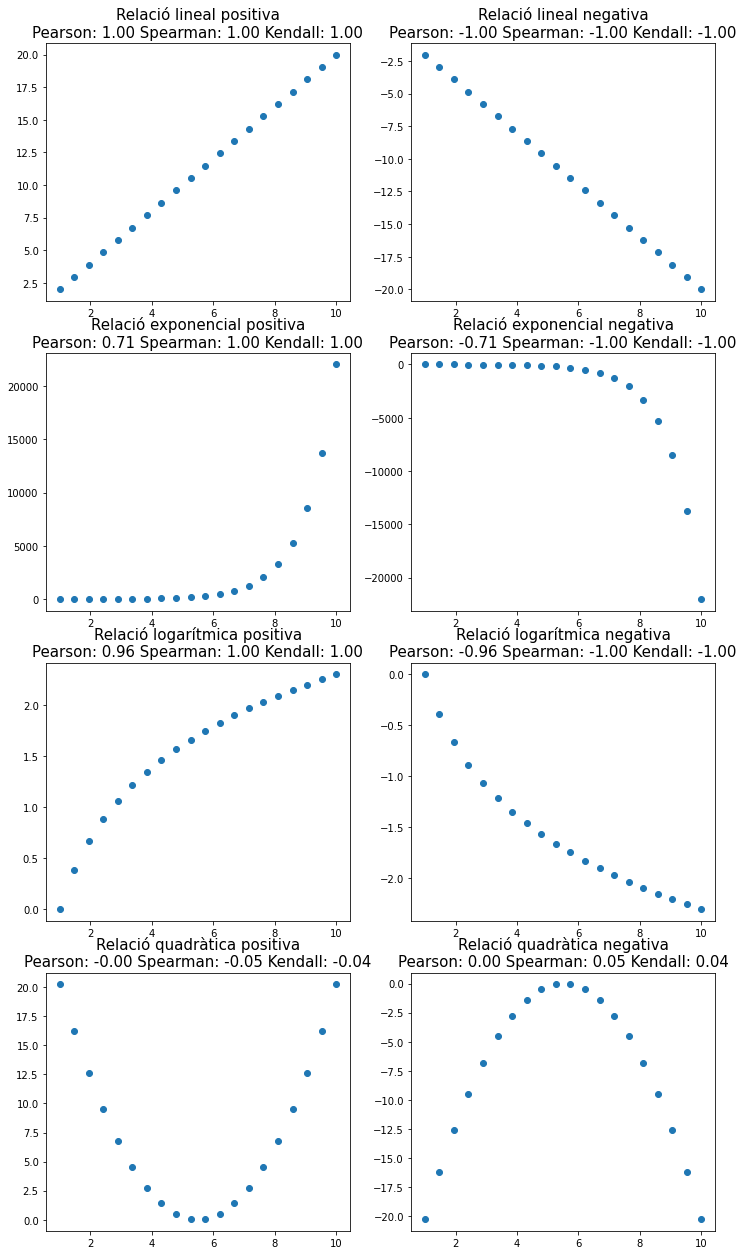

In [10]:
x = np.linspace(1, 10, num=20)
plt.figure(figsize=(12, 12))
plt.subplots_adjust(top=1.5)

for i, (y, title) in enumerate([(x * 2, 'Relació lineal positiva'),
                                (x * -2, 'Relació lineal negativa'),
                                (np.exp(x), 'Relació exponencial positiva'),
                                (-np.exp(x), 'Relació exponencial negativa'),
                                (np.log(x), 'Relació logarítmica positiva'),
                                (-np.log(x), 'Relació logarítmica negativa'),
                                ((x-5.5)**2, 'Relació quadràtica positiva'),
                                (-(x-5.5)**2, 'Relació quadràtica negativa')]):
    pearson = pearson_correlation(x, y)
    spearman = scipy.stats.spearmanr(x, y).correlation
    kendall = scipy.stats.kendalltau(x, y).correlation
    title += '\nPearson: {:.2f} Spearman: {:.2f} Kendall: {:.2f}'.format(pearson, spearman, kendall)
    plt.subplot(4,2, i+1)
    plt.scatter(x, y)
    plt.title(title, size=15)

Això doncs, podem concluir que:
- En la relació lineal, tots els coeficients de correlació són 1
- En la relació exponencial i logarítmica, l'únic coeficient de correlació que no és 1 és el de Pearson, mentres que els coeficients de correlació no paramètrics sí que troben una relació lineal perfecte.
- En la relació quadràtica, tots els coeficients de correlació donen 0.